# Topical Lectures April 2021
## Drone control, part 1: keyboard flying is hard
Andreas Freise, Bas Swinkels 13.04.2021

This is the first notebook of the hands-on session in which play with our drone object. The aims of this notebook are a) to get familiar with the notebook format and to b) to learn that flying a drone without any controls is difficult. 

In [1]:
print('hello worlds')

hello worlds


In [2]:
import matplotlib
matplotlib.use('TKAgg')

In [3]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# This is a local file containing the drone code. You are supposed to manage the drone
# as a 'black box', but feel free to study the code if you want.
import module

# For the interactive plots we need the QT backend
%matplotlib TKAgg

KeyError: 'tkagg'

The ```module``` package contains code which models a drone and separately a pre-defined plot that can be used for interactive plots.

The main interaction with the drone happens through the following steps:
 * create a drone with: ```drone = module.Drone(...)```
 * set the voltage of the left and right rotor motors with ```self.drone.set_V(V_left, V_right)```
 * model one time step (1/60 sec) with ```results = self.drone.update()```. ```results``` will contain a current data from the drone such as postion and velocities, see below.

Typically for each task you create a new drone model and then run a loop in which you continuosly set the rotor voltages and then run one time step forward. You can either plot the data received in ```results``` in an interactive way, or store it in an array for a later analysis.

In [4]:
# An example code that applys manual signals to the drone: 
# the volatges send to the left and right rotor can be changed with key commands

class Control():
    def __init__(self, _drone):
        self.drone = _drone
        self.plotter = module.Plotter(self.drone)

        # step values for keyboard control
        self.key_dF = 0.03
        self.key_dF0 = 0.005 

        self.stop = False
        self.reset()

    def reset(self):
        self.V_left  = 0
        self.V_right = 0
        self.F = 0.5
        self.offset = 0
        self.plotter.reset()

    def set_F2leftright(self):
        # computing the left and right volatges from F and offset
        F_right = self.F - self.offset
        F_left =  self.F + self.offset
        self.V_left  = F_left
        self.V_right = F_right

    def key_control_simple(self):
        # initialising interactive plot
        self.stop = False
        self.drone.stop = False
        # connecting key event manager
        self.plotter.fig.canvas.mpl_disconnect(self.plotter.fig.canvas.manager.key_press_handler_id)
        self.cid = self.plotter.fig.canvas.mpl_connect('key_press_event', self.on_key_simple)

        # starting loop to run the drone 
        # ----------------------------------------------------
        while not self.stop:
            # send volatges to drone
            self.drone.set_V(self.V_left, self.V_right)
            # drone moves for 1/60 seconds
            self.drone.update()
            # update display
            self.plotter.update_display()
        # ----------------------------------------------------
        # disconecting key event manager
        self.plotter.fig.canvas.mpl_disconnect(self.cid)
        
    def on_key_simple(self, event):
        if event.key == 'escape':
            print('Stopping!')
            self.stop = True
        elif event.key == 'w':
            self.F += self.key_dF
        elif event.key == 's':
            self.F -= self.key_dF
        elif event.key == 'a':
            self.offset -= self.key_dF0
        elif event.key == 'd':
            self.offset += self.key_dF0
        self.set_F2leftright()


In [4]:
module

<module 'module' from '/mnt/d/Google_Drive/PhD-master/ubuntu-storage/ubuntu-windows/software/controls_2021/module.py'>

<ipython-input-5-32a3b8a5bc78>:4: UserWarning: Running drone in test mode. Don't use this for system identification
  drone = module.Drone(test=True)


<IPython.core.display.Javascript object>


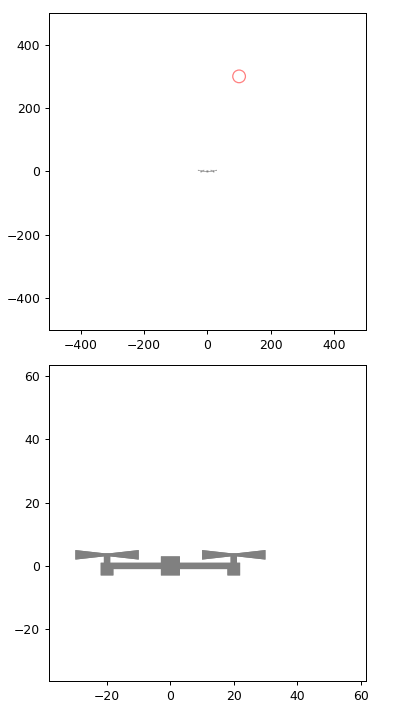

In [5]:
%matplotlib notebook
# Create the drone object in test mode 
# (Only use the test mode this in this notebook!)
drone = module.Drone(test=True)

# set a target for us to reach at y=100cm, z=300cm with a radius of 10cm
drone.set_targets(np.array([[100,300,10]]))

# initialising our control object
control = Control(drone)

In [ ]:
# This starts the interactive plot, after running this command, click on the plot and 
# use the WASD keys to fly the drone. Use ESC to stop.
control.key_control_simple()

In [ ]:
control.plotter.close()

In [ ]:
drone.reset()
control.reset()